#Assignment SVM ForestFires Data
classify the Size_Categorie using SVM

month month of the year: 'jan' to 'dec'

day day of the week: 'mon' to 'sun'

FFMC FFMC index from the FWI system: 18.7 to 96.20

DMC DMC index from the FWI system: 1.1 to 291.3

DC DC index from the FWI system: 7.9 to 860.6

ISI ISI index from the FWI system: 0.0 to 56.10

temp temperature in Celsius degrees: 2.2 to 33.30

RH relative humidity in %: 15.0 to 100

wind wind speed in km/h: 0.40 to 9.40

rain outside rain in mm/m2 : 0.0 to 6.4

Size_Categorie the burned area of the forest ( Small , Large)

#Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn .model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [ ]:
from google.colab import files
Uploaded=files.upload()

Saving forestfires (1).csv to forestfires (1).csv


In [ ]:
Data=pd.read_csv("forestfires (1).csv")


#EDA

In [ ]:
Data.head(5)


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
Data[Data.duplicated()]


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


#Droping unwanted Coumns month and Day
Month and Day column already available saperate for each days and month information so leat us drop month and day column

In [ ]:
Data=Data.drop(columns=["month","day"])


#Droping duplicate rows

In [ ]:
Data=Data.drop_duplicates()


In [ ]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           509 non-null    float64
 1   DMC            509 non-null    float64
 2   DC             509 non-null    float64
 3   ISI            509 non-null    float64
 4   temp           509 non-null    float64
 5   RH             509 non-null    int64  
 6   wind           509 non-null    float64
 7   rain           509 non-null    float64
 8   area           509 non-null    float64
 9   dayfri         509 non-null    int64  
 10  daymon         509 non-null    int64  
 11  daysat         509 non-null    int64  
 12  daysun         509 non-null    int64  
 13  daythu         509 non-null    int64  
 14  daytue         509 non-null    int64  
 15  daywed         509 non-null    int64  
 16  monthapr       509 non-null    int64  
 17  monthaug       509 non-null    int64  
 18  monthdec  

In [ ]:
Data.describe()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
column=["FFMC",	"DMC","DC","ISI","temp","RH","wind","rain","size_category"]


In [ ]:
cormatrix=Data[column].corr()


<ipython-input-11-7a02feeee0b4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormatrix=Data[column].corr()


<Axes: >

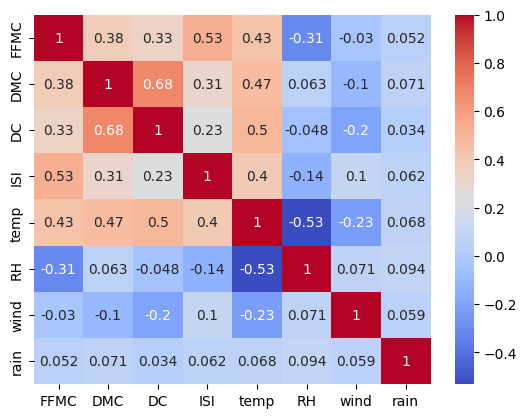

In [ ]:
sns.heatmap(cormatrix,annot=True, cmap='coolwarm')


Scatter plot with histogram

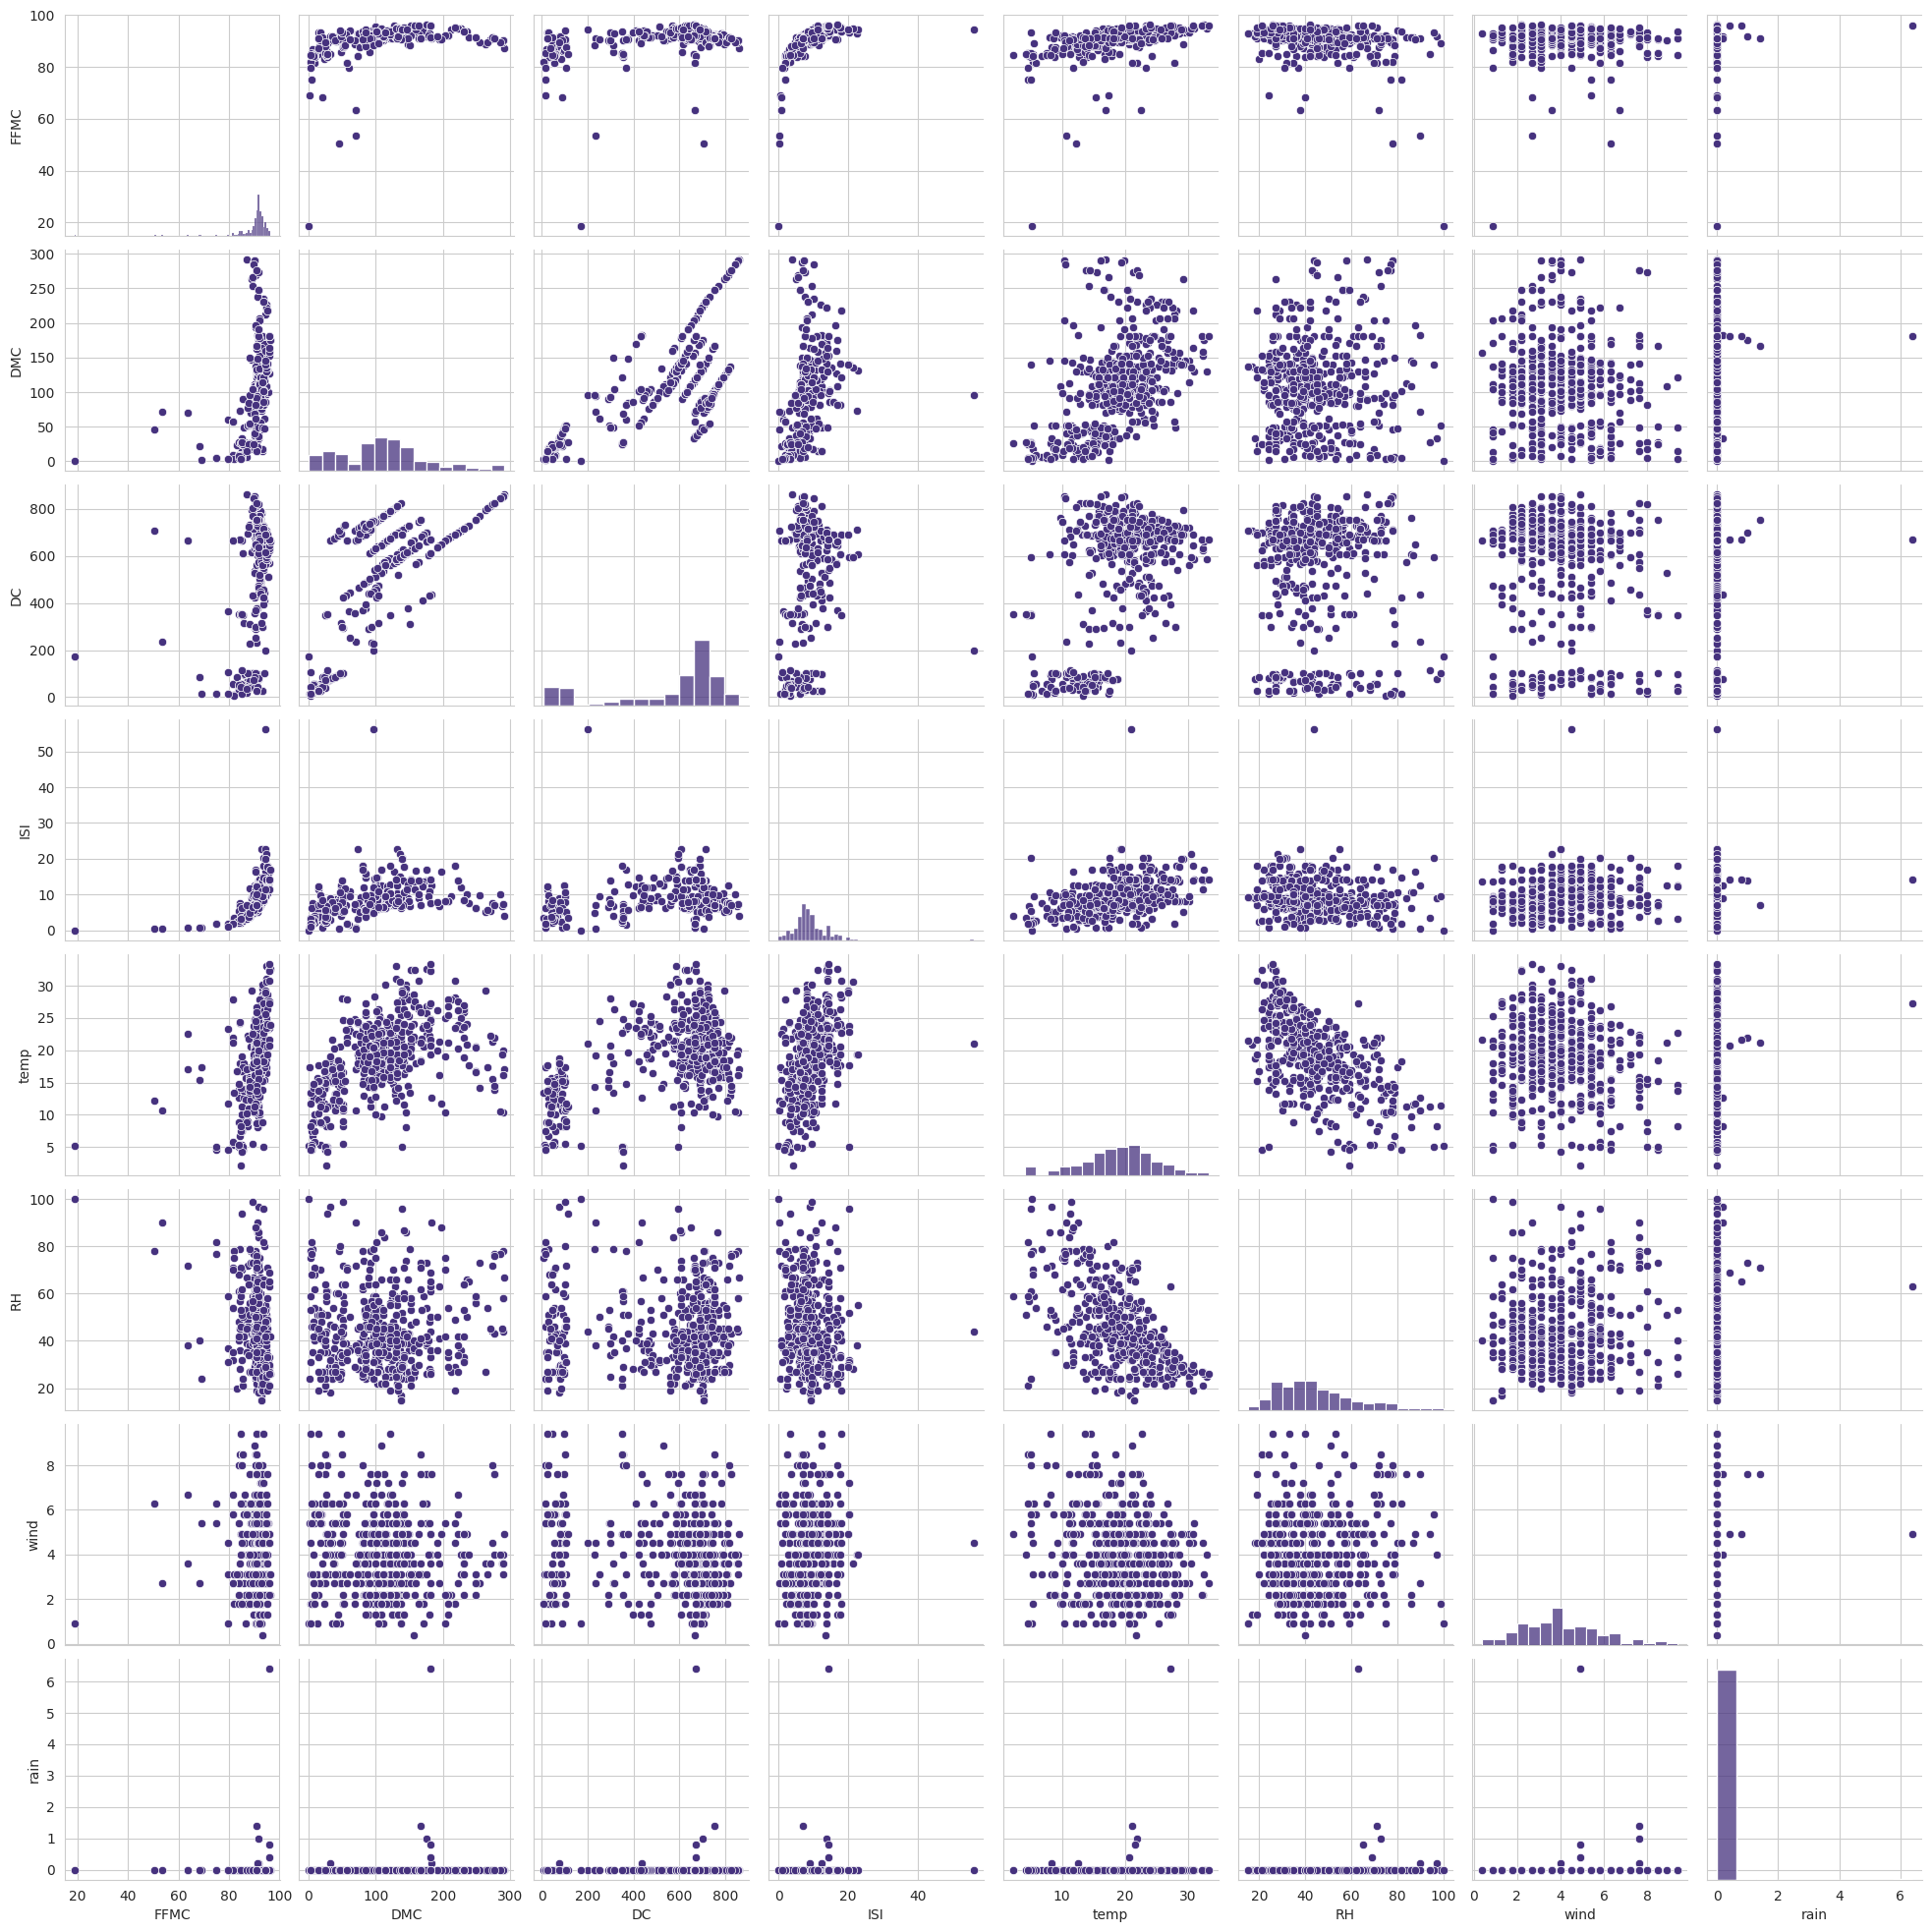

In [ ]:
sns.set_palette('viridis')
sns.set_style(style='whitegrid')
column=["FFMC",	"DMC","DC","ISI","temp","RH","wind","rain"]
sns.pairplot(data=Data[column])

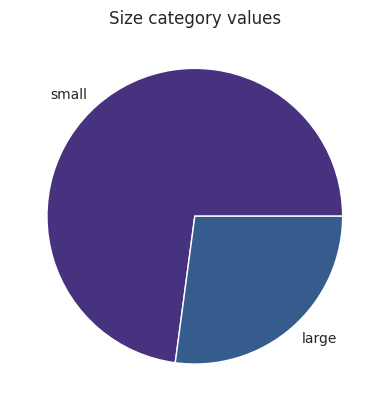

In [ ]:
plt.title("Size category values")
plt.pie(Data["size_category"].value_counts(),labels=Data["size_category"].unique())
plt.show()

Data is unbalanced


#Label Encoding target Feature


In [ ]:
label=LabelEncoder()


In [ ]:
Data.iloc[:,28]=label.fit_transform(Data.iloc[:,28])


<ipython-input-16-e5bdab8e73b0>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Data.iloc[:,28]=label.fit_transform(Data.iloc[:,28])


#Split Data set as X and Y.


In [ ]:
X=Data.iloc[:,0:28]
Y=Data.iloc[:,28]

In [ ]:
X.head(6)


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y.head(6)


0    1
1    1
2    1
3    1
4    1
5    1
Name: size_category, dtype: int64

#Train - Test Split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


#Hyper Parameter Tuning with GridSearchCV

In [ ]:
model=SVC()


In [ ]:
params={'kernel':['rbf','Polynomial Kernel','Sigmoid Kernel'],'gamma':[100,50,0.5,0.1,0.01,0.001,0.0001],
               'C':[15,14,13,12,11,10,0.1,0.001,0.0001]}

In [ ]:
gcv=GridSearchCV(model,params,cv=10)


In [ ]:
gcv.fit(X_train,Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1260 fits failed out of a total of 1890.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
630 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001, 0.0001],
                         'gamma': [100, 50, 0.5, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'Polynomial Kernel',
                                    'Sigmoid Kernel']})

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
gcv.best_score_


0.9240243902439023

In [ ]:
gcv.best_params_


{'C': 15, 'gamma': 0.0001, 'kernel': 'rbf'}

#Model Building

In [ ]:
SVM=SVC(C=15, gamma=0.0001, kernel='rbf')


In [ ]:
SVM.fit(X_train,Y_train)


SVC(C=15, gamma=0.0001)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
SVM.support_vectors_


array([[ 93.9, 135.7, 586.7, ...,   0. ,   0. ,   0. ],
       [ 94.8, 108.3, 647.1, ...,   0. ,   0. ,   0. ],
       [ 84.7,  26.7, 352.6, ...,   0. ,   0. ,   0. ],
       ...,
       [ 84.9,  32.8, 664.2, ...,   0. ,   1. ,   0. ],
       [ 94.3,  96.3, 200. , ...,   0. ,   0. ,   0. ],
       [ 87.6,  52.2, 103.8, ...,   0. ,   0. ,   0. ]])

In [ ]:
SVM.support_vectors_.shape


(134, 28)

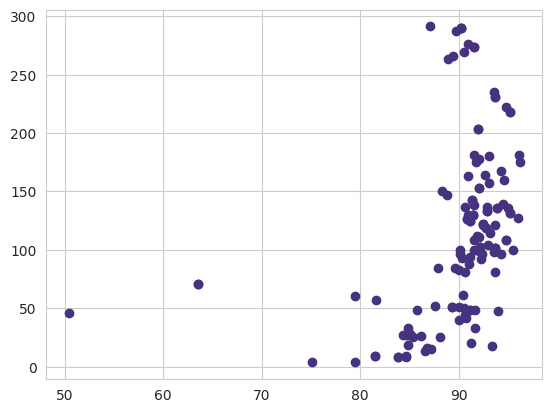

In [ ]:
plt.scatter(SVM.support_vectors_[:,0],SVM.support_vectors_[:,1])


In [ ]:
print(accuracy_score(Y_train,SVM.predict(X_train)))


0.9557739557739557


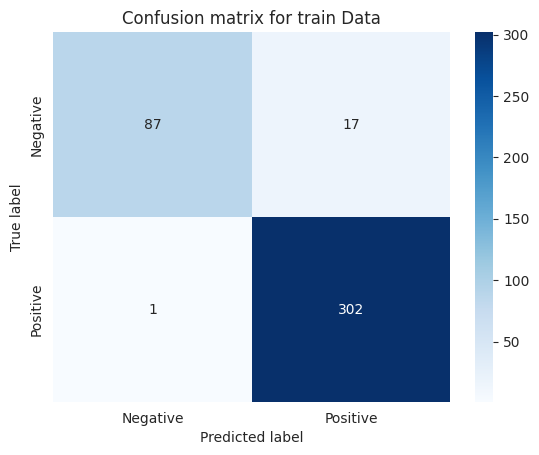

In [ ]:
labels=["Negative","Positive"]
cm=confusion_matrix(Y_train,SVM.predict(X_train))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for train Data')
plt.show()

In [ ]:
print(classification_report(Y_train,SVM.predict(X_train)))


              precision    recall  f1-score   support

           0       0.99      0.84      0.91       104
           1       0.95      1.00      0.97       303

    accuracy                           0.96       407
   macro avg       0.97      0.92      0.94       407
weighted avg       0.96      0.96      0.95       407



In [ ]:
confusion_matrix(Y_test,SVM.predict(X_test))


array([[25,  9],
       [ 2, 66]])

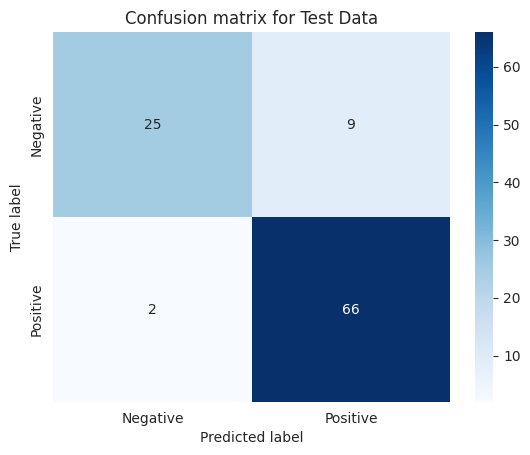

In [ ]:
labels=["Negative","Positive"]
cm=confusion_matrix(Y_test,SVM.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for Test Data')
plt.show()

In [ ]:
print(classification_report(Y_test,SVM.predict(X_test)))


              precision    recall  f1-score   support

           0       0.93      0.74      0.82        34
           1       0.88      0.97      0.92        68

    accuracy                           0.89       102
   macro avg       0.90      0.85      0.87       102
weighted avg       0.90      0.89      0.89       102



#CONCLUSION
Model performing very well for both training set as well as test set.we took Radial Basis Function (RBF) Kernel With C=15(penalty parameter for misclassification It controls the tradeoff between having a wider margin and correctly classifying training points. Larger values of C will result in a smaller margin and fewer training errors.SO to avoid hard margin we allow some misclassification),gamma(Kernal parameter)=0.0001